<a href="https://colab.research.google.com/github/sofawwg/dataset/blob/main/%D0%B1%D0%BE%D1%81%D1%82%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('boston.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


смотрим на распределение цены жилья:


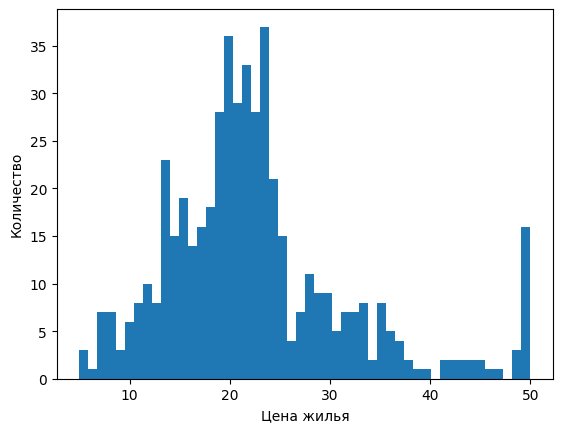

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['medv'], bins=50)
plt.xlabel('Цена жилья')
plt.ylabel('Количество')
plt.show()

корреляционная матрица


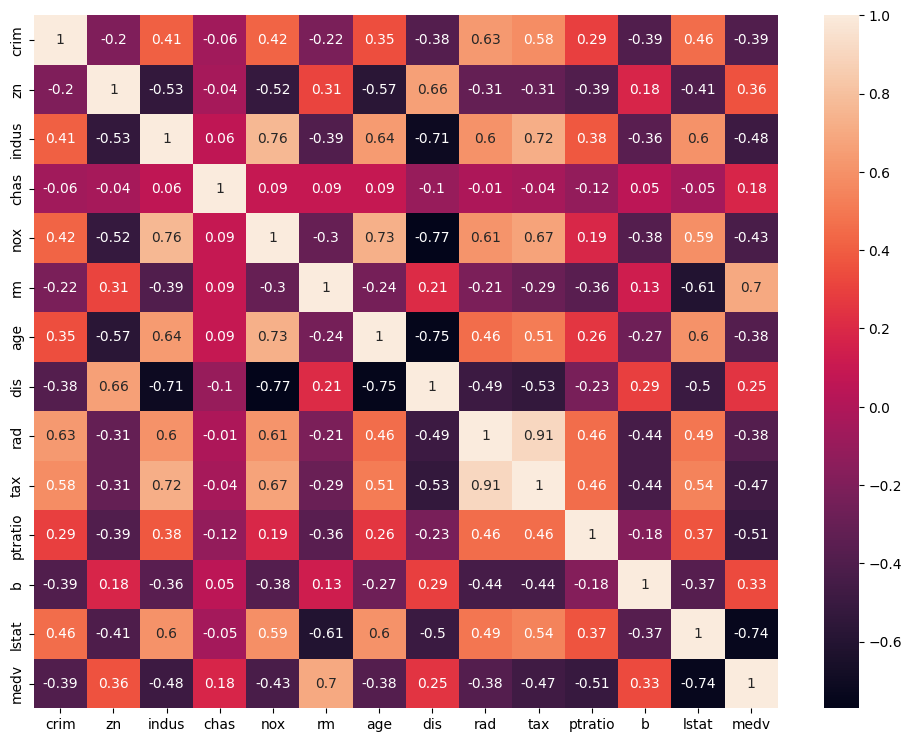

In [ ]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

 максимально положительно коррелируют стоимость жилья и кол-во комнат (0.7), а максимально отрицательно коррелируют стоимость жилья и % населения низшего класса (-0.74).


готовим данные для обучения модели 
первым шагом будем разделять данные на обучающую и тестовую выборки

In [ ]:
X = df.iloc[:, :-1].values # все признаки, кроме цены
y = df.iloc[:, -1].values # цена жилья

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_test_split из Scikit-learn использовали для разделения данных на обучающую и тестовую выборки. выбрали размер тестовой выборки 20% от всего набора данных и установили случайное число (random_state), чтобы результаты могли воспроизвести.

обучаем модели линейной регрессии и случайного леса.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

print('Среднеквадратическая ошибка обучающей выборки:', mean_squared_error(y_train, y_train_pred_lr))
print('Среднеквадратическая ошибка тестовой выборки:', mean_squared_error(y_test, y_test_pred_lr))
print('R^2 обучающей выборки:', r2_score(y_train, y_train_pred_lr))
print('R^2 тестовой выборки:', r2_score(y_test, y_test_pred_lr))

Среднеквадратическая ошибка обучающей выборки: 21.86279471487961
Среднеквадратическая ошибка тестовой выборки: 23.380836480270087
R^2 обучающей выборки: 0.7293585058196337
R^2 тестовой выборки: 0.7634174432138486


случ лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=1)
model_rf.fit(X_train, y_train)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

print('Среднеквадратическая ошибка обучающей выборки:', mean_squared_error(y_train, y_train_pred_rf))
print('Среднеквадратическая ошибка тестовой выборки:', mean_squared_error(y_test, y_test_pred_rf))
print('R^2 обучающей выборки:', r2_score(y_train, y_train_pred_rf))
print('R^2 тестовой выборки:', r2_score(y_test, y_test_pred_rf))

Среднеквадратическая ошибка обучающей выборки: 1.3314914562376194
Среднеквадратическая ошибка тестовой выборки: 8.847196235686303
R^2 обучающей выборки: 0.9835173479921446
R^2 тестовой выборки: 0.9104782967198913


используем модели для предсказания стоимости жилья для произвольных входных данных. создаём массив значений входных признаков и передаём его как аргумент в метод predict нашей модели

In [ ]:
input_data = [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.90, 5.33]
input_data = [input_data]
predicted_price_lr = model_lr.predict(input_data)
predicted_price_rf = model_rf.predict(input_data)

print('Линейная регрессия, предсказанная стоимость жилья:', predicted_price_lr)
print('Случайный лес, предсказанная стоимость жилья:', predicted_price_rf)

Линейная регрессия, предсказанная стоимость жилья: [27.2212319]
Случайный лес, предсказанная стоимость жилья: [33.6466]
